# Import Libraries and dataset

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

# Category 3.0

In [2]:
# Players to be selected
# li = ["Barisal","Bhola","Khepupara","Khulna","Mongla","Patuakhali","Hatiya"]

# li = ['Dinajpur','Syedpur','Rangpur','Bogra','Mymensingh',"Rajshahi"]
# df_new=df[df.Station_Names.isin(li)]
df_new=df.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01
1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01
2,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01
3,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01
4,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01


In [3]:
z = df_new["Wind_Speed"]

# df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR",], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,Period,Wind_Speed
0,29.4,12.3,0.0,68.0,0.6,7.831915,22.7,90.36,1949.01,0.453704
1,30.0,14.1,0.0,77.0,0.8,7.831915,22.7,90.36,1950.01,0.453704
2,28.2,12.3,0.0,77.0,0.6,7.831915,22.7,90.36,1951.01,0.453704
3,26.6,12.3,2.0,77.0,1.0,7.831915,22.7,90.36,1952.01,0.453704
4,30.0,13.3,10.0,75.0,1.6,7.831915,22.7,90.36,1953.01,0.453704


In [4]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Preprocessiong with Standard Scaler 

In [6]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# Random Forest Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

#  Prediction
Y_pred_RF = regressor.predict(testX)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred_RF})
df_temp.head()

,Actual,Predicted
1703,1.8,1.479056
17198,1.1,0.854043
3356,2.8,2.999778
20860,3.7,2.666000
20037,1.3,1.368000


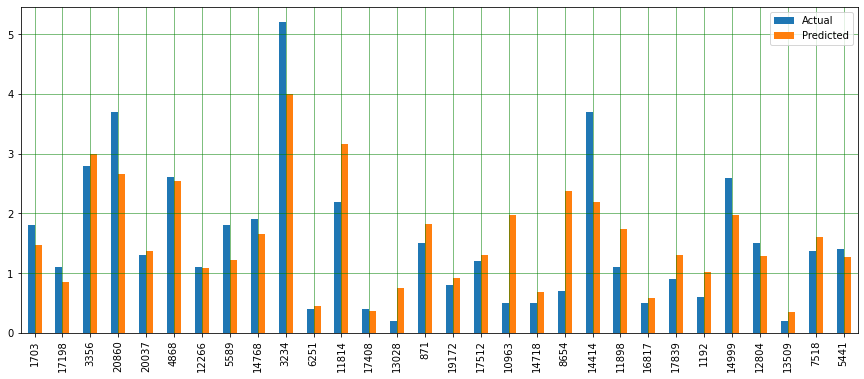

In [8]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [9]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred_RF)
score

0.7554619151942693

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred_RF)))

Mean Absolute Error: 0.34731639113627605
Mean Squared Error: 0.26312595381192244
Root Mean Squared Error: 0.5129580429352116


# XGBoost Regression

In [11]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(trainX_scaled,trainY)
prediction_XGB=XGB.predict(testX_scaled)

[18:08:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': prediction_XGB})
df_temp.head()

,Actual,Predicted
1703,1.8,1.254980
17198,1.1,1.180135
3356,2.8,3.093517
20860,3.7,2.576413
20037,1.3,1.407471


In [13]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, prediction_XGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_XGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_XGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_XGB)))

R2 Value: 0.7251339548268528
Mean Absolute Error: 0.3776615455785783
Mean Squared Error: 0.2957592080765344
Root Mean Squared Error: 0.5438374831478007


# MLP Regression

In [14]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [15]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
1703,1.8,1.199599
17198,1.1,1.818743
3356,2.8,3.369200
20860,3.7,2.831923
20037,1.3,1.133670


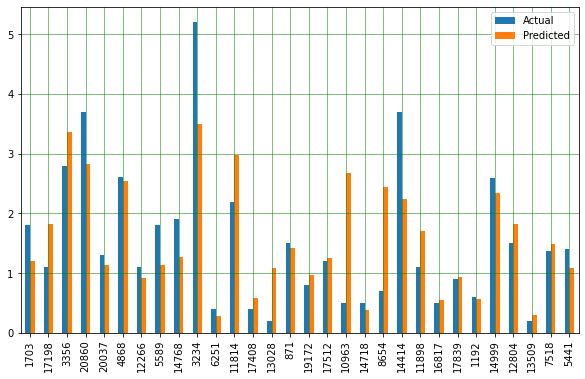

In [16]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

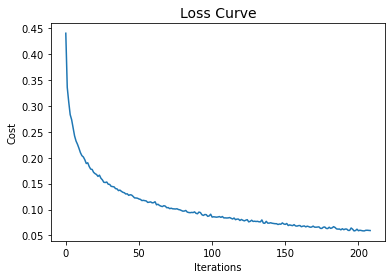

In [17]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [18]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.7129089296255546

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
1703,1.8,1.324506
17198,1.1,1.463705
3356,2.8,3.903774
20860,3.7,2.707970
20037,1.3,1.471396


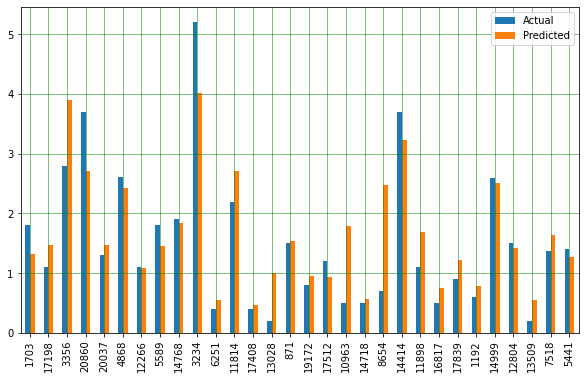

In [21]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [22]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, grid_predictions))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

R2 Value: 0.748438249049638
Mean Absolute Error: 0.366110172489286
Mean Squared Error: 0.270683504019412
Root Mean Squared Error: 0.5202725286034349


In [23]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'pred_RF': Y_pred_RF,'pred_XGB':prediction_XGB,'pred_MLP': grid_predictions,'mean_pred':mean_pred})
df_temp2.head()

,Actual,pred_RF,pred_XGB,pred_MLP,mean_pred
1703,1.8,1.479056,1.254980,1.324506,1.352847
17198,1.1,0.854043,1.180135,1.463705,1.165961
3356,2.8,2.999778,3.093517,3.903774,3.332356
20860,3.7,2.666000,2.576413,2.707970,2.650128
20037,1.3,1.368000,1.407471,1.471396,1.415622


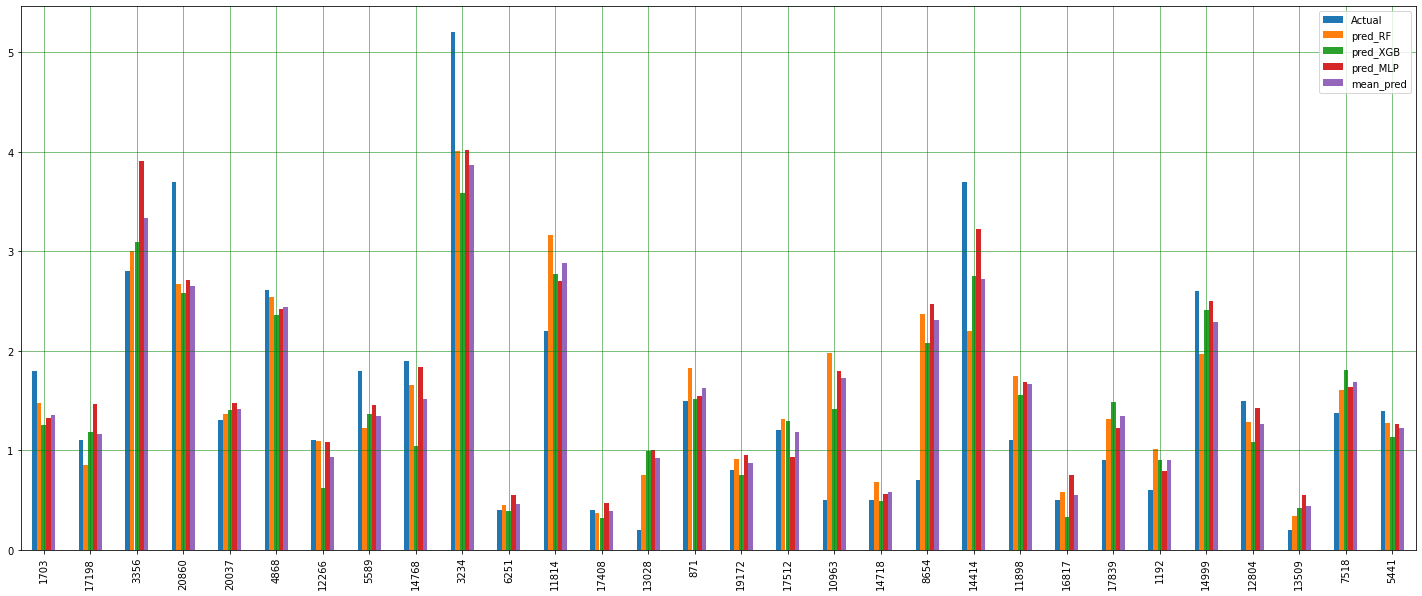

In [24]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [25]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'mean_pred':mean_pred})
df_temp2.head()

,Actual,mean_pred
1703,1.8,1.352847
17198,1.1,1.165961
3356,2.8,3.332356
20860,3.7,2.650128
20037,1.3,1.415622


In [26]:
print('R2 Value:',metrics.r2_score(testY, mean_pred)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, mean_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, mean_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, mean_pred)))

R2 Value: 77.9937969963208 %
Mean Absolute Error: 0.33563815643055117
Mean Squared Error: 0.23678942115384496
Root Mean Squared Error: 0.486610132604989
